# introduce
If this kernel can help you, feel free to add some contents below to yours and waht I need is just a reference link. Thanks!

## EDA 
Explore data analysis is the first step when you get an dataset.   
All the techniques to summarize the main characteristics, often with visual methods, are part of EDA.

With this digit dataset, what we need to do is to transform the matrix to a image.

## pre-precess
* get more data (but not MNIST)  
    Not recommend to use MNIST because some test data is from MNIST, this makes this competition meaningless.  
    But in fact, it's impossible to reach 1.00 or even 0.999 without using MNIST. In other words, when the acc reaches 1.00 or even 0.999, this model is already overfitting.
    
     Maybe you can try   
    1. [Distorting the MNIST Image Data Set](https://msdn.microsoft.com/en-us/magazine/dn754573.aspx)  
    2. [Optical Recognition of Handwritten Digits Data Set](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)  
    3. [Pen-Based Recognition of Handwritten Digits Data Set](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)  
    4. [Semeion Handwritten Digit Data Set](http://archive.ics.uci.edu/ml/datasets/Semeion+Handwritten+Digit)  
    5. [The EMNIST Dataset's Digit Part](https://www.nist.gov/itl/iad/image-group/emnist-dataset) It's independent of MNIST Dataset.  
    6. [Chars74K Dataset](http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/) is also considerable, but I doubt the performance after training.
    
* change grey value from int to float
* 0-1 format
* Cropping and Resize  

Note: I used MNIST and got 0,99942 before I realize that there're some test data is from MNIST, which is not recommended.

If you want to improve your model you can try more pre-precess tech like Data Augmentation and ensemble technique like stacking.    
You can also read the classic paper [Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) to get more ideas.

## feature selection
* VarianceThreshold
* ch2
* PCA

## model
* naive bayes
* knn
* svm
* decison tree
* random forest
* cnn
"LaNet5""Simple CNN" and "Complex CNN

## model ensemble
Simply by average voting.

## summary and result
Use cnn and rank 20th   
My summary is at the end of this kernel.

# import data

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


size_img = 28
threshold_color = 100 / 255

# Any results you write to the current directory are saved as output.
file = open("./Datasets/train.csv")
data_train = pd.read_csv(file)

y_train = np.array(data_train.iloc[:, 0])
x_train = np.array(data_train.iloc[:, 1:])

file = open("./Datasets/test.csv")
data_test = pd.read_csv(file)
x_test = np.array(data_test)

n_features_train = x_train.shape[1]
n_samples_train = x_train.shape[0]
n_features_test = x_test.shape[1]
n_samples_test = x_test.shape[0]
print(n_features_train, n_samples_train, n_features_test, n_samples_test)
print(x_train.shape, y_train.shape, x_test.shape)

784 42000 784 28000
(42000, 784) (42000,) (28000, 784)


# show the image
Maybe we can call this EDA (haha~

In [6]:
def show_img(x):
    plt.figure(figsize=(8,7))
    if x.shape[0] > 100:
        print(x.shape[0])
        n_imgs = 16
        n_samples = x.shape[0]
        x = x.reshape(n_samples, size_img, size_img)
        for i in range(16):
            plt.subplot(4, 4, i+1) #devide figure into 4x4 and choose i+1 to draw
            plt.imshow(x[i])
        plt.show()
    else:
        plt.imshow(x)
        plt.show()

42000


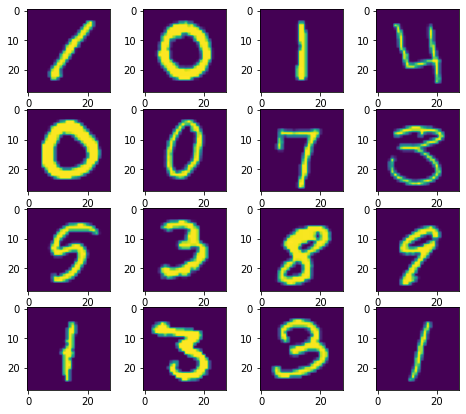

In [7]:
show_img(x_train)

28000


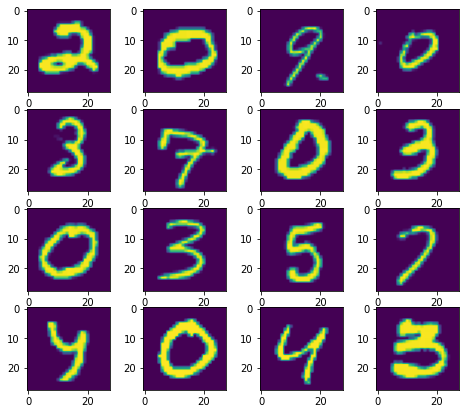

In [8]:
show_img(x_test)

# pre-process

## change grey value from int to float

In [9]:
def int2float_grey(x):
    x = x / 255
    return x

### Cropping and Resize

In [10]:
# find the left egde
# Note: the problem is that I don't do the parrallel part
def find_left_edge(x):
    edge_left = []
    n_samples = x.shape[0]
    for k in range(n_samples):
        for j in range(size_img):
            for i in range(size_img):
                if (x[k, size_img*i+j] >= threshold_color):
                    edge_left.append(j)
                    break
            if (len(edge_left) > k):
                break
    return edge_left

In [11]:
# find the right egde
# Note: the problem is that I don't do the parrallel part
def find_right_edge(x):
    edge_right = []
    n_samples = x.shape[0]
    for k in range(n_samples):
        for j in range(size_img):
            for i in range(size_img):
                if (x[k, size_img*i+(size_img-1-j)] >= threshold_color):
                    edge_right.append(size_img-1-j)
                    break
            if (len(edge_right) > k):
                break
    return edge_right

In [12]:
# find the top egde
# Note: the problem is that I don't do the parrallel part
def find_top_edge(x):
    edge_top = []
    n_samples = x.shape[0]
    for k in range(n_samples):
        for i in range(size_img):
            for j in range(size_img):
                if (x[k, size_img*i+j] >= threshold_color):
                    edge_top.append(i)
                    break
            if (len(edge_top) > k):
                break
    return edge_top

In [13]:
# find the bottom egde
# Note: the problem is that I don't do the parrallel part
def find_bottom_edge(x):
    edge_bottom = []
    n_samples = x.shape[0]
    for k in range(n_samples):
        for i in range(size_img):
            for j in range(size_img):
                if (x[k, size_img*(size_img-1-i)+j] >= threshold_color):
                    edge_bottom.append(size_img-1-i)
                    break
            if (len(edge_bottom) > k):
                break
    return edge_bottom

In [14]:
#Note：when we do the stretch part by ourselves,there may be some blank cells
# when the scale factor is more than 2

from skimage import transform
def stretch_image(x):
    #get edges
    edge_left = find_left_edge(x)
    edge_right = find_right_edge(x)
    edge_top = find_top_edge(x)
    edge_bottom = find_bottom_edge(x)
    
    #cropping and resize
    n_samples = x.shape[0]
    x = x.reshape(n_samples, size_img, size_img)
    for i in range(n_samples):      
        x[i] = transform.resize(x[i][edge_top[i]:edge_bottom[i]+1, edge_left[i]:edge_right[i]+1], (size_img, size_img))
    x = x.reshape(n_samples, size_img ** 2)
    show_img(x)

## Feature Selection
### VarianceThreshold

In [15]:
from sklearn.feature_selection import VarianceThreshold
def get_threshold(x_train, x_test):
    selector = VarianceThreshold(threshold=0).fit(x_train)
    x_train = selector.transform(x_train)
    x_test = selector.transform(x_test)
    print(x_train.shape)
    return x_train, x_test

### chi2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#选择K个最好的特征，返回选择特征后的数据
# selector = SelectKBest(chi2, k=500).fit(x_train, y_train)
# x_train = selector.transform(x_train)
# x_test = selector.transform(x_test)
# print(x_train.shape)

### PCA

In [16]:
from sklearn.decomposition import PCA
def get_pca(x_train, x_test):
    pca = PCA(n_components=0.95)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    print(x_train.shape, x_test.shape)
    return x_train, x_test

## Here you can choose to run the subpart

In [17]:
# do the pre-process part

x_train = int2float_grey(x_train)
x_test = int2float_grey(x_test)
# stretch_image(x_train)
# stretch_image(x_test)
# x_train, x_test = get_threshold(x_train, x_test)
# x_train, x_test = get_pca(x_train, x_test)

# use CNN
In CNN part, I try three different structures, which I call "LaNet5""Simple CNN" and "Complex CNN".

In [19]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Reshape, Conv2D, AveragePooling2D, Flatten
from keras.layers import MaxPooling2D


y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_all_pred = np.zeros((3, n_samples_test)).astype(np.int64)
print(y_all_pred.dtype)

int64


## LaNet5
![LaNet5 architecture](https://endlesslethe.com/wordpress/wp-content/uploads/2018/06/LaNet5-architecture.jpg)
LeNet-5 comprises 7 layers, not counting theinput, all of which contain trainable parameters (weights).  

The input is a 32x32 pixel image. This is significantly larger than the largest character in the database (at most 20x20 pixels centered in a 28x28 field).   
The reason is that it is desirable that potential distinctive features such as stroke end-points or corner can appear in the center of the receptive ield of the highest-level feature detectors.

input layer: 32*32  
cov layer(3): C1 6x5x5 C3 16x5x5 C5 120x5x5  
pooling layer(2):S2 S4 size is 2x2  
full connection layer(2): F6'active function is "tanh" and output layer  uses RBF
output layer：10（possibilities of digit 0-9）  

### Improvement
1. Here I use 28x28 pixel image as input, and on the first conv layer I use 6x3x3 fliter.  
2. On the output layer I use softmax fuction to get the predicted labels rather than RBF function
3. I use two full connection layer with "relu" function instead of one layer with "tanh" fumction.

In [20]:
model_name = "LaNet5"
model = Sequential()
model.add(Reshape(target_shape=(1, 28, 28), input_shape=(784,)))
model.add(Conv2D(kernel_size=(3, 3), filters=6, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(kernel_size=(5, 5), filters=16, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(kernel_size=(5, 5), filters=120, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(Flatten())
model.add(Dense(output_dim=120, activation='relu'))
model.add(Dense(output_dim=120, activation='relu'))
model.add(Dense(output_dim=10, activation='softmax'))

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, batch_size=64)
y_pred = model.predict_classes(x_test)
output_prediction(y_pred, model_name)
y_all_pred[0] = y_pred

TypeError: __init__() missing 1 required positional argument: 'units'

## Simple CNN
Although I use some technics that AlexNet uses like dropout, relu function,  the performance reaches a plateau because of the depth.

In [ ]:
model_name = "CNN"
model = Sequential()

model.add(Reshape(target_shape=(1, 28, 28), input_shape=(784,)))
model.add(Conv2D(kernel_size=(3, 3), filters=32, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(AveragePooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(kernel_size=(3, 3), filters=32, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(AveragePooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(kernel_size=(3, 3), filters=64, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(AveragePooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(output_dim=256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(output_dim=256, activation='relu'))
model.add(Dense(output_dim=10, activation='softmax'))

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=128)
y_pred = model.predict_classes(x_test)
output_prediction(y_pred, model_name)

y_all_pred[1] = y_pred

## Complex CNN

In [ ]:
model_name = "ComplexCNN"

model = Sequential()
model.add(Reshape(target_shape=(1, 28, 28), input_shape=(784,)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(output_dim=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_dim=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_dim=10, activation='softmax'))

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=80, batch_size=128)
y_pred = model.predict_classes(x_test)
output_prediction(y_pred, model_name)

y_all_pred[2] = y_pred

# Model Ensemble

In [ ]:
model_name = "Ensemble"
print(y_pred.shape)
y_ensem_pred = np.zeros((n_samples_test,))
for i,line in enumerate(y_all_pred.T):
    y_ensem_pred[i] = np.argmax(np.bincount(line))
print(y_ensem_pred.shape, y_ensem_pred)
y_ensem_pred = y_ensem_pred.astype("int64")
output_prediction(y_ensem_pred, model_name)

# summary
**Note: There're some posts saying that it's impossible to make acc to 1 beacuse some samples are so hard to recognize for both machines and human beings, and some of these whose model has acc "1.0" cheats. So I won't keep improving my model. **

And interestingly, my last submission ranks 21th, but after one night it ranks now 20th XD. Happy.
![dr](https://endlesslethe.com/wordpress/wp-content/uploads/2018/05/dr.png)

## data processing
The cropping and resize technique improve models' performance slightly, and reduce the number of features significantly with pca. Before this, when we choose 90% principal component, there are 87 features. After this, there's only 37 features. So that we can increase the percentage of principal component to 95%, which stage has 58 features.

PCA works well with GaussianNB. It reduce the number of features significantly. However, Its disadvantage is that we have to use GaussianNB because of the meaningless position in an new vector space.

And chi2 doesn't improve this model because the label has the same importance. It's easily to find out that the more points we take into account, the more accurate our model will be.

## model
Naive Bayes is so simple, but it shows a decent result.
Decision tree works so well on the train set, but on the k-cross-hold test set it works even worse than Naive Bayes.
KNN, SVM and RF all give a good answer whose accuracy is more than 0.95.
And RF performs so well based on decision tree with vote strategy.

CNN is of course the best way to solve this problem.

# result
## Naive Bayes
When I use **MultinomialNB only**, the acc on the train set is **0.8261190476190476**, and on the test set is **0.83114**, ranks 2180th.  
When I use **BernoulliNB only**, the acc on the train set is **0.8347857142857142**.    
When i use **GaussianNB only**, the acc on the train set is  **0.5571904761904762**.  
When i use **GaussianNB with pca**, the acc on the train set is  **0.8739285714285714**, and on the test set is **0.87385**, ranks 2136th.

## KNN
When I use **KNN with PCA**, the acc on the train set is ** 0.982452380952381**, and on the test set is **0.97371**, ranks 1400th. 

**Note: On the dataset of the following models, we use pca and the cropping and resize technique.**

## SVM
Based on the basic dataset, the acc on the train set is ** 0.9966190476190476**, and on the test set is **0.98585**, ranks 1039th.  
And based on the bigger dataset, the acc on the train set is ** 0.9966190476190476**, and on the test set is **0.99614**, ranks 214th.

## the decision tree
the acc on the train set is **1.0**, but on the test set is only **0.83857**

## RF
Based the basic dataset, the acc on the train set is ** 0.998**, and on k-cross-hold test set, the acc is **0.98 +- 0.02**.  
And based on the bigger dataset, the acc on the test set is **0.99914**, ranks 36th.

## CNN
the acc on the train set is **1**, and on the test set is **0.99942**, ranks 21th.

# screen shoots
## knn
![dr knn](https://endlesslethe.com/wordpress/wp-content/uploads/2018/05/dr-knn.png)

## svm
use the basic dataset:
![dr svm](https://endlesslethe.com/wordpress/wp-content/uploads/2018/05/dr-svm.png)
use the bigger dataset:
![dr svm 2](https://endlesslethe.com/wordpress/wp-content/uploads/2018/05/dr-svm-2.png)

## decision tree
![dr dt](https://endlesslethe.com/wordpress/wp-content/uploads/2018/05/dr-dt.png)

## rf
use the bigger dataset:
![dr rf](https://endlesslethe.com/wordpress/wp-content/uploads/2018/05/dr-rf.png)

## cnn
![dr cnn](https://endlesslethe.com/wordpress/wp-content/uploads/2018/05/dr-cnn.png)
